# Set up Kaggle API Credentials and Loading the Dataset

In [3]:
import os
import shutil

#Create .kaggle folder
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

#Move the kaggle json file into the kaggle config directory
shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))


'C:\\Users\\PC/.kaggle/kaggle.json'

In [4]:
#Download dataset
!kaggle datasets download -d ealaxi/paysim1


Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0
paysim1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
#Unzipping downloaded file
import zipfile

with zipfile.ZipFile("paysim1.zip", 'r') as zip_ref:
    zip_ref.extractall(".")  # Extracts to current directory


In [6]:
import pandas as pd

df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
print(df.isnull().sum())  # Counts nulls per column

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
df['isFraud'].value_counts(normalize=True)

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

sns.set(style="whitegrid", palette="pastel")

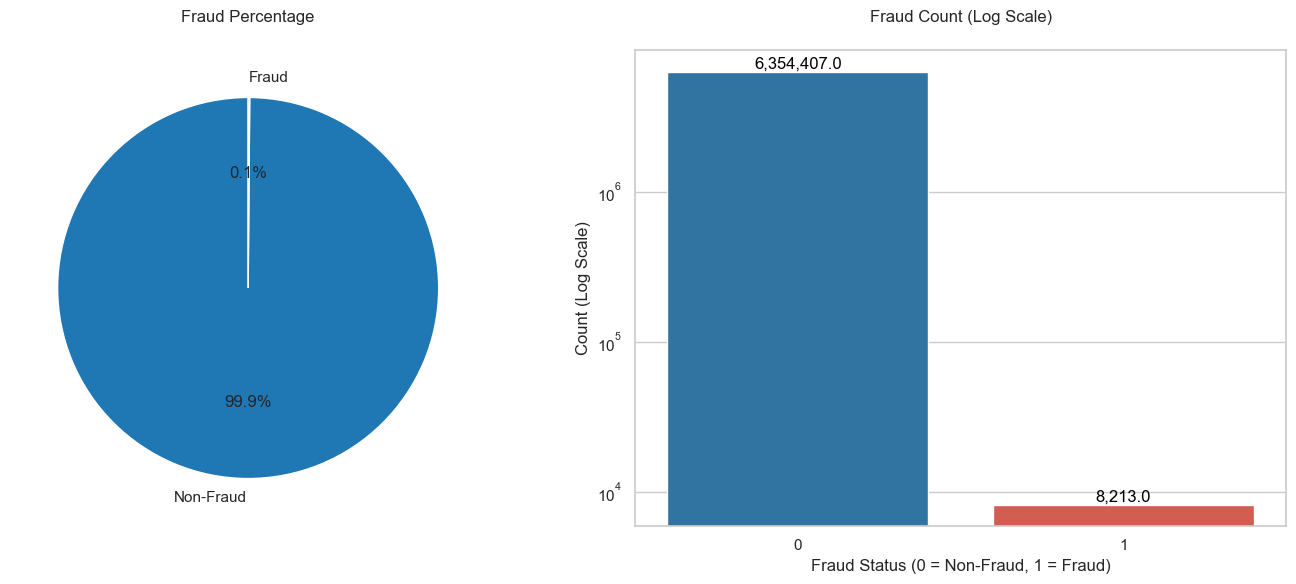

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# --- Pie Chart (Left) ---
fraud_pct = df["isFraud"].value_counts(normalize=True) * 100
ax1.pie(fraud_pct, 
        labels=['Non-Fraud', 'Fraud'], 
        autopct='%1.1f%%',
        colors=['#1f77b4','#E74C3C'],
        startangle=90)
ax1.set_title("Fraud Percentage", pad=20)

# --- Bar Chart (Right) ---
sns.countplot(x="isFraud", data=df, hue="isFraud",  
              palette=['#1f77b4','#E74C3C'], 
              legend=False, 
              ax=ax2)
ax2.set_yscale('log')
ax2.set_title("Fraud Count (Log Scale)", pad=20)
ax2.set_xlabel("Fraud Status (0 = Non-Fraud, 1 = Fraud)")
ax2.set_ylabel("Count (Log Scale)")

# Add count labels
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width() / 2., p.get_height() * 1.05), 
                ha='center', 
                color='black')

plt.tight_layout()
plt.show()

The dataset is heavily imbalanced, with very few fraud cases compared to normal transactions. To address this, we'll later apply **SMOTE** to oversample the minority class and improve model learning.


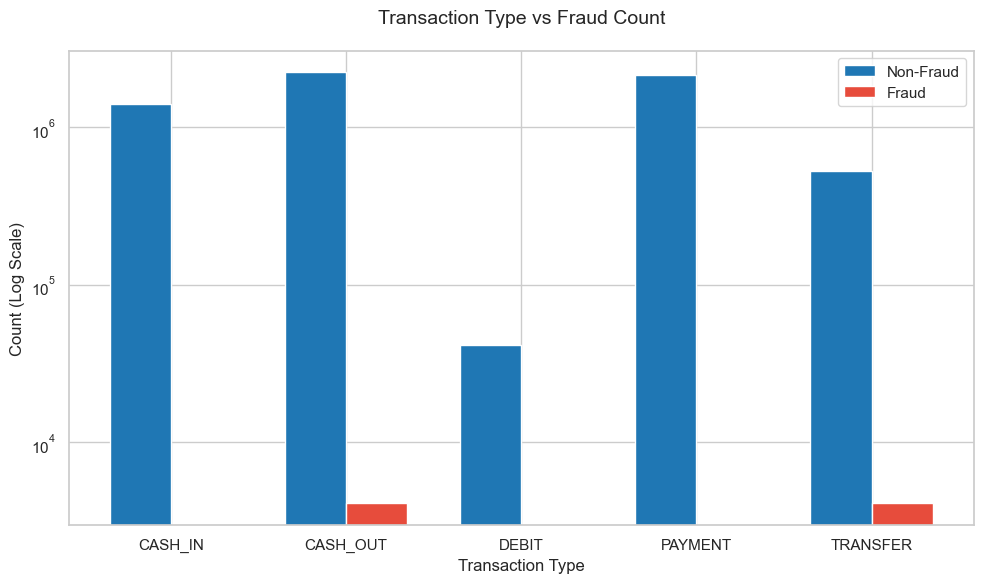

In [13]:
import numpy as np

# Prepare data
tx_type_fraud = df.groupby(['type', 'isFraud']).size().unstack()
types = tx_type_fraud.index
x = np.arange(len(types))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, tx_type_fraud[0], width, label='Non-Fraud', color='#1f77b4')
rects2 = ax.bar(x + width/2, tx_type_fraud[1], width, label='Fraud', color='#E74C3C')

ax.set_title('Transaction Type vs Fraud Count', fontsize=14, pad=20)
ax.set_xlabel('Transaction Type', fontsize=12)
ax.set_ylabel('Count (Log Scale)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(types)
ax.set_yscale('log')  # Critical for visibility
ax.legend()
fig.tight_layout()
plt.show()

Only the **'CASH_OUT'** and **'TRANSFER'** transaction types contain fraudulent activity, while all other types show zero fraud cases. This highlights that fraud is concentrated within specific transaction methods, which can inform feature selection and model focus.


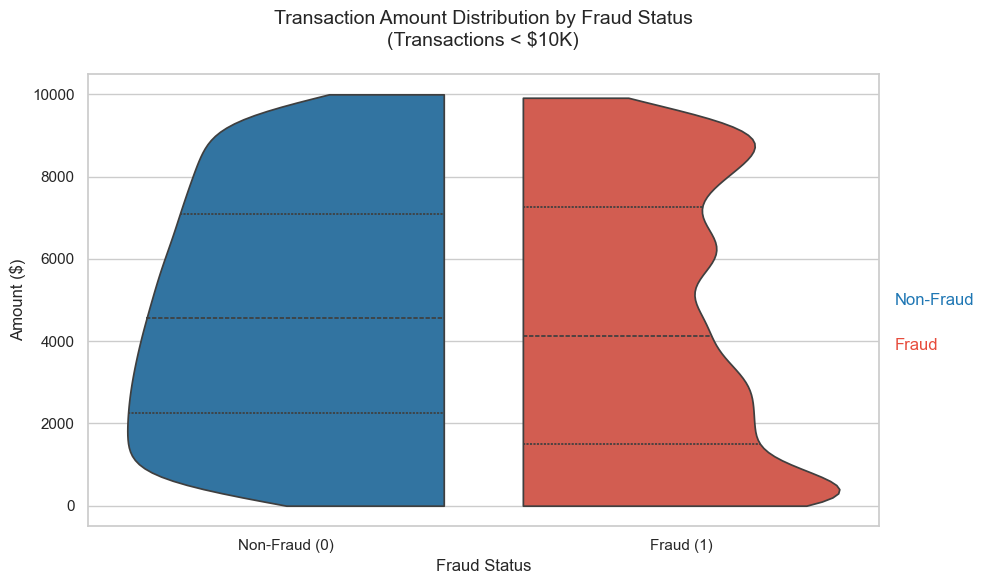

In [43]:
## Filter data first to improve performance
plot_data = df[df['amount'] < 10000].copy()

plt.figure(figsize=(10, 6), dpi=100)  # Higher DPI for clearer rendering

# Create split violins for better comparison
sns.violinplot(data=plot_data,
               x="isFraud",
               y="amount",
               hue="isFraud",
               palette={0: '#1f77b4', 1: '#E74C3C'},  # Direct color mapping
               split=True,  # Puts both violins side-by-side
               inner="quartile",  # Shows median/interquartile lines
               bw_method=0.2,  # Reduces smoothing for sharper plot
               cut=0)  # Extends violins to data limits

# Customize appearance
plt.title("Transaction Amount Distribution by Fraud Status\n(Transactions < $10K)", 
          fontsize=14, pad=20)
plt.xlabel("Fraud Status", fontsize=12)
plt.ylabel("Amount ($)", fontsize=12)
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.legend().remove()  # Clean up since we labeled directly

# Add explicit color legend
plt.text(1.02, 0.5, "Non-Fraud", color='#1f77b4', 
         transform=plt.gca().transAxes, va='center')
plt.text(1.02, 0.4, "Fraud", color='#E74C3C',
         transform=plt.gca().transAxes, va='center')

# Optimize performance
plt.tight_layout()
plt.show()

The distribution of transaction amounts for fraud cases shows **visible but not sharply defined spikes** between **$0-$2,000** and **$8,000-$10,000**. These ranges may indicate common fraud thresholds or limits exploited by attackers. While not sharply peaked, the elevated density in these zones suggests targeted behavior worth further investigation.


# Feature Engineering

From EDA we saw fraud happens only in TRANSFER and CASH_OUT transactions
We can filter for those.

In [15]:
df_filtered = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])].copy()


In [16]:
# We encode the transaction type
df_filtered['type'] = df_filtered['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})


We then create new features that capture suspicious behaviour

In [17]:
# Difference between original balances before and after transaction
df_filtered['balance_diff_orig'] = df_filtered['oldbalanceOrg'] - df_filtered['newbalanceOrig']

# Difference between destination balances
df_filtered['balance_diff_dest'] = df_filtered['newbalanceDest'] - df_filtered['oldbalanceDest']

# Was the origin balance zero before or after? Could be suspicious.
df_filtered['is_orig_balance_zero_before'] = df_filtered['oldbalanceOrg'] == 0
df_filtered['is_orig_balance_zero_after'] = df_filtered['newbalanceOrig'] == 0

# Same for destination
df_filtered['is_dest_balance_zero_before'] = df_filtered['oldbalanceDest'] == 0
df_filtered['is_dest_balance_zero_after'] = df_filtered['newbalanceDest'] == 0


In [18]:
# Remove unwanted columns
df_model = df_filtered.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
df_model.shape


(2770409, 14)

In [19]:
df_model.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balance_diff_orig,balance_diff_dest,is_orig_balance_zero_before,is_orig_balance_zero_after,is_dest_balance_zero_before,is_dest_balance_zero_after
2,1,1,181.00,181.0,0.0,0.0,0.00,1,181.0,0.00,False,True,True,True
3,1,0,181.00,181.0,0.0,21182.0,0.00,1,181.0,-21182.00,False,True,False,True
15,1,0,229133.94,15325.0,0.0,5083.0,51513.44,0,15325.0,46430.44,False,True,False,False
19,1,1,215310.30,705.0,0.0,22425.0,0.00,0,705.0,-22425.00,False,True,False,True
24,1,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,10835.0,2712905.89,False,True,False,False


In [20]:
df_filtered['isFraud'].value_counts(normalize=True)

isFraud
0    0.997035
1    0.002965
Name: proportion, dtype: float64

# Model Training

## Imports

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.svm import OneClassSVM
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


## Evaluation Functions

In [22]:
def print_anomaly_summary(name, y_true, y_pred):
    total_transactions = len(y_true)
    total_anomalies = sum(y_pred)
    recall = recall_score(y_true, y_pred, zero_division=0)
    precision = precision_score(y_true, y_pred, zero_division=0)
    
    print(f"🔍 {name} Anomaly Detection Evaluation:")
    print(f"- Flagged {100 * total_anomalies / total_transactions:.2f}% of total transactions as anomalies")
    print(f"- Captured {100 * recall:.2f}% of actual frauds (recall)")
    print(f"- {100 * precision:.2f}% of the anomalies were actual frauds (precision)")
    print("-" * 60)

def print_supervised_summary(name, y_true, y_pred):
    total_preds = len(y_pred)
    total_fraud_preds = sum(y_pred)
    recall = recall_score(y_true, y_pred, zero_division=0)
    precision = precision_score(y_true, y_pred, zero_division=0)
    
    print(f"📊 {name} Supervised Model Evaluation:")
    print(f"- Flagged {100 * total_fraud_preds / total_preds:.2f}% of total transactions as fraud")
    print(f"- Captured {100 * recall:.2f}% of actual frauds (recall)")
    print(f"- {100 * precision:.2f}% of the flagged frauds were actual frauds (precision)")
    print("-" * 60)


## Preparing the Data

In [23]:
# Use df_model from earlier steps — filtered and cleaned

# Split into features and labels
X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


## Supervised Learning

### 1. Random Forest

In [24]:
# SMOTE resampling
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [25]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)



📊 Random Forest Supervised Model Evaluation:
- Flagged 0.39% of total transactions as fraud
- Captured 95.66% of actual frauds (recall)
- 73.20% of the flagged frauds were actual frauds (precision)
------------------------------------------------------------


### 2. XGBoost Classsifier

In [39]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_res, y_train_res)

y_pred_xgb = xgb.predict(X_test)


## Anomaly Detection(Unsupervised Learning)

Uses only the non- fraud data for training

In [40]:
normal_df = df_model[df_model['isFraud'] == 0].drop('isFraud', axis=1)
X_full = df_model.drop('isFraud', axis=1)
y_full = df_model['isFraud']


### 3. Isolation Forest

In [41]:
iso = IsolationForest(contamination=0.005, random_state=42)
iso.fit(normal_df)

y_pred_iso = iso.predict(X_full)
y_pred_iso = [1 if val == -1 else 0 for val in y_pred_iso]

#print_anomaly_summary("Isolation Forest", y_full, y_pred_iso)


In [42]:
print_supervised_summary("Random Forest", y_test, y_pred_rf)
print_supervised_summary("XGBoost", y_test, y_pred_xgb)
print_anomaly_summary("Isolation Forest", y_full, y_pred_iso)


📊 Random Forest Supervised Model Evaluation:
- Flagged 0.39% of total transactions as fraud
- Captured 95.66% of actual frauds (recall)
- 73.20% of the flagged frauds were actual frauds (precision)
------------------------------------------------------------
📊 XGBoost Supervised Model Evaluation:
- Flagged 0.56% of total transactions as fraud
- Captured 98.99% of actual frauds (recall)
- 52.38% of the flagged frauds were actual frauds (precision)
------------------------------------------------------------
🔍 Isolation Forest Anomaly Detection Evaluation:
- Flagged 0.61% of total transactions as anomalies
- Captured 38.37% of actual frauds (recall)
- 18.58% of the anomalies were actual frauds (precision)
------------------------------------------------------------


## Conclusions

Three models were evaluated for fraud detection: **Random Forest**, **XGBoost**, and **Isolation Forest**. Their performance was compared based on the percentage of transactions flagged, their ability to correctly detect frauds (**recall**), and the accuracy of those fraud predictions (**precision**).

- **Random Forest** achieved a **recall of 95.66%** and a **precision of 73.20%**, while flagging only **0.39%** of all transactions. This indicates a strong balance between catching frauds and minimizing false positives.

- **XGBoost** had the highest **recall at 98.99%**, meaning it captured nearly all frauds. However, its **precision was lower at 52.38%**, flagging more transactions overall (**0.56%**) and producing more false positives.

- **Isolation Forest**, an unsupervised anomaly detection model, flagged **0.61%** of transactions, but only achieved **38.37% recall** and **18.58% precision**. This means most of the frauds were missed, and most of what was flagged was not actually fraudulent.



## Recommendations

1. **Adopt Random Forest as the primary fraud detection model**  
   It provides an excellent balance of high recall and high precision, making it suitable for production deployment. It also reduces unnecessary investigations by flagging fewer non-fraud transactions.

2. **Use XGBoost in high-risk environments where missing fraud is unacceptable**  
   Although it produces more false positives, XGBoost’s high recall makes it useful in situations where maximizing fraud detection is the top priority.

3. **Deploy Isolation Forest as a complementary anomaly detection layer**  
   While not effective on its own, it can be valuable for detecting novel or emerging fraud patterns, especially in unlabeled or evolving datasets.

4. **Retrain and tune models regularly**  
   Fraud patterns change over time. Use periodic retraining, hyperparameter tuning, and feature engineering to adapt and maintain high detection performance.
